Bonjour à vous. Je vous remercie du temps que vous prendrez pour évaluer mon travail. J'espère qu'il vous sera agréable à lire.
# Mise en place
## Chargement des données

In [1]:
from sklearn import datasets, manifold, cluster, metrics
from sklearn.model_selection import train_test_split
%pylab inline

mnist = datasets.load_digits(); # J'utilise le dataset de sklearn

print(mnist.data.shape);
print(mnist.target.shape);

Populating the interactive namespace from numpy and matplotlib
(1797, 64)
(1797,)


## Splitting
Le dataset est déjà d'une taille raisonnable, aucun besoin de le redimensionner.
Scindont-le maintenant afin d'avoir notre train set et notre test set.

In [2]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target);

# Clustering
## Réduction dimensionnelle
Pour la réduction dimensionnelle, j'ai opté pour la méthode tSNE qui semble être une méthode fonctionnant bien pour ce dataset.

In [3]:
tsne = manifold.TSNE(n_components=2, init='pca');
X_tsne = tsne.fit_transform(X_train);

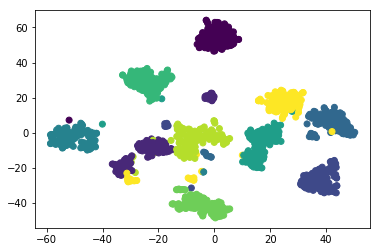

In [4]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_train); # Visualisation du résultat attendu

## Clustering
Pour le clustering, j'ai choisis la méthode k-means. Etant donnée la forme en "paquet" des donnée, ça me semble être une méthode efficace.
### Train set

In [5]:
cls = cluster.KMeans(n_clusters=10);
cls.fit(X_tsne);

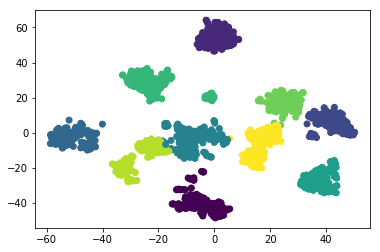

In [6]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=cls.labels_); # Visualisation du résultat obtenu

In [7]:
print("Silhouette du train set : ", metrics.silhouette_score(X_train, cls.labels_));
print("Score sur le train set : ", metrics.adjusted_mutual_info_score(y_train, cls.labels_));

Silhouette du train set :  0.15770311744507667
Score sur le train set :  0.894277954836761


### Test set

In [8]:
X_tsne_pred = tsne.fit_transform(X_test);
y_pred = cls.predict(X_tsne_pred);

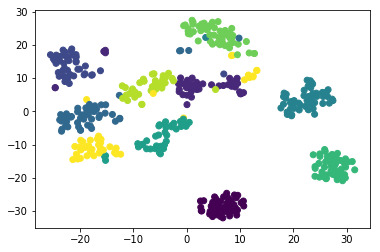

In [9]:
plt.scatter(X_tsne_pred[:,0], X_tsne_pred[:,1], c=y_test); # Visualisation du résultat attendu

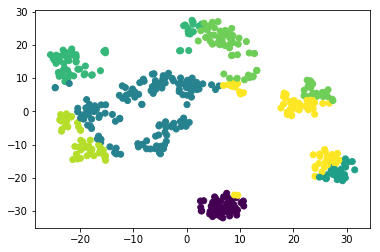

In [10]:
plt.scatter(X_tsne_pred[:,0], X_tsne_pred[:,1], c=y_pred); # Visualisation du résultat obtenu

In [11]:
print("Silhouette du test set : ", metrics.silhouette_score(X_test, y_pred));
print("Score sur le test set : ", metrics.adjusted_mutual_info_score(y_test, y_pred));

Silhouette du test set :  0.07783148075075064
Score sur le test set :  0.5234029198756618


Le score de silhouette est positif et proche de zéro. Celà signifie qu'il y a chevochement des clusters sans pour autant causer une erreur "trop" importante. En relançant le script plusieurs fois, nous constatons la stabilité de l'algorithme.

Le score utilisant des informations extrinsèques (vrais labels) nous donne un résultat tournant autour de 45%, ce qui n'est pas exceptionnel.